# 1) Load and Check Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")
import warnings
warnings.simplefilter('ignore')

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
data.drop(["id","Unnamed: 32"], axis = 1, inplace = True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [7]:
# Diagnosis
# M : malignant
# B : benign
data.diagnosis = [1 if i.strip() == "M" else 0 for i in data.diagnosis]

# 2) Variable Analysis

In [8]:
numeric_variable = data.drop(["diagnosis"], axis = 1)

In [9]:
from sklearn.ensemble import ExtraTreesRegressor
x = numeric_variable
y = data.diagnosis
ext = ExtraTreesRegressor(random_state=42)
model = ext.fit(x,y)
df = pd.DataFrame(sorted(zip(ext.feature_importances_,numeric_variable.columns)), columns=['Value','Variable'])

<AxesSubplot:xlabel='Value', ylabel='Variable'>

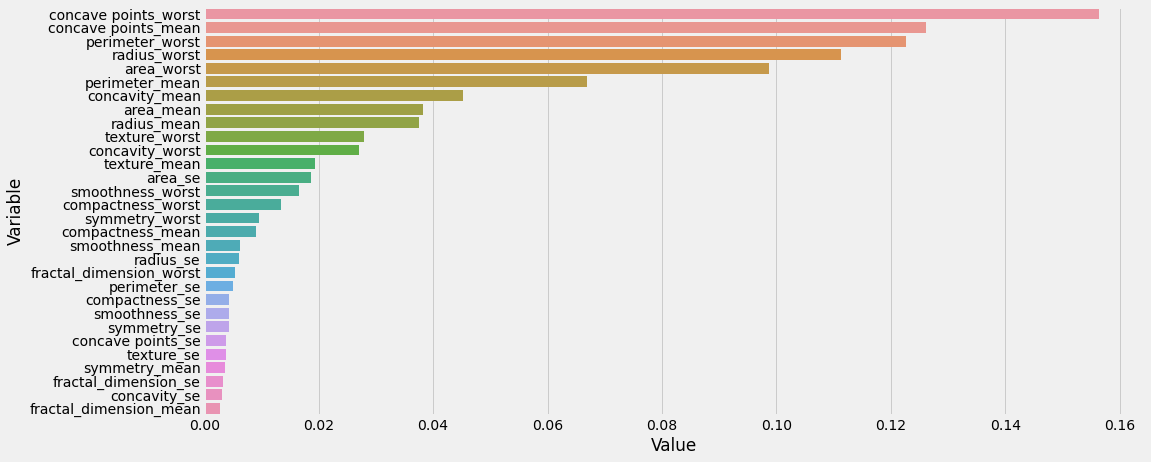

In [10]:
#Visualization
plt.figure(figsize  =(15,7))
sns.barplot(x = "Value", y= "Variable", data = df.sort_values(["Value"],ascending = False))

In [11]:
#numeric variable visualization
def numeric(col):
    fig, ax = plt.subplots(1,2, figsize = (15,6))
    sns.scatterplot(x = data[col], y = data["diagnosis"], ax = ax[0])
    sns.distplot(data[col], kde = False, ax = ax[1])
    fig.suptitle(str(col) + ' analysis')

### Concave points_worst

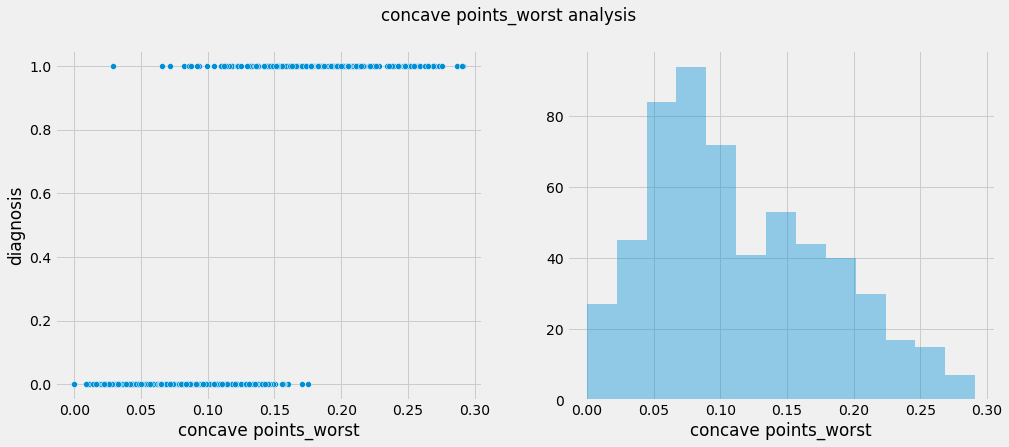

In [12]:
numeric("concave points_worst")

### Concave points_mean

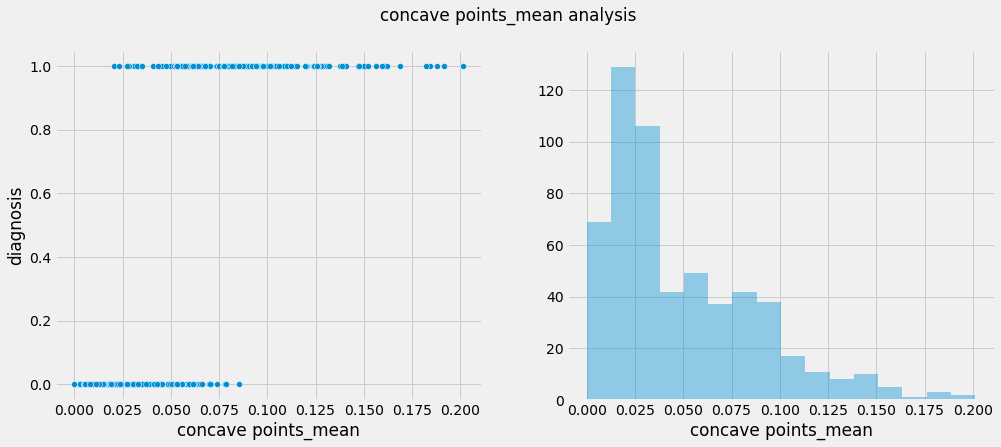

In [13]:
numeric("concave points_mean")

### Perimeter_worst

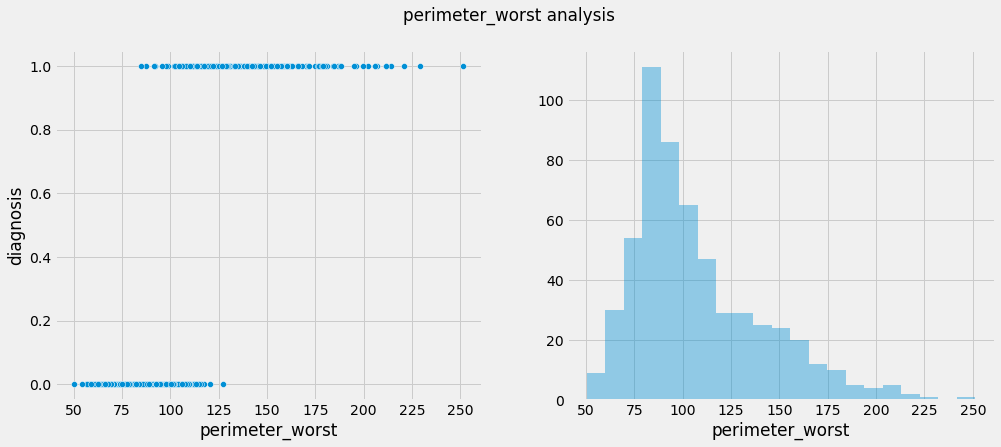

In [14]:
numeric("perimeter_worst")

### Radius_worst

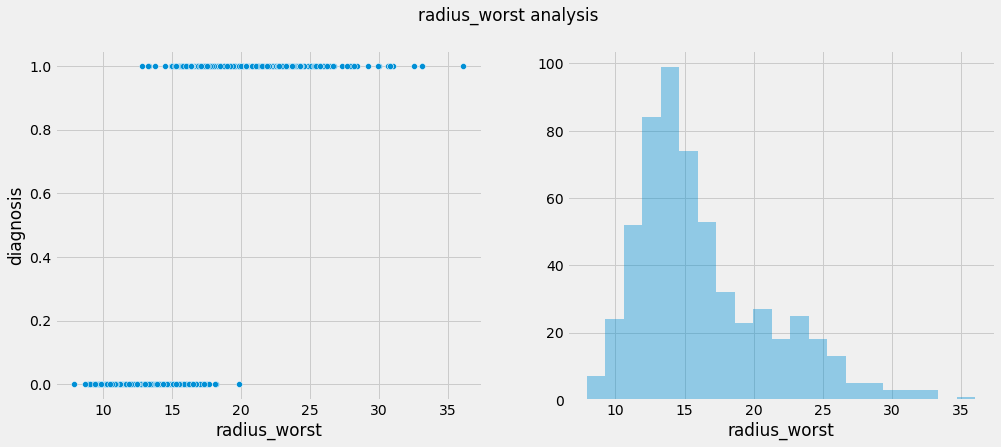

In [15]:
numeric("radius_worst")

### Area_worst

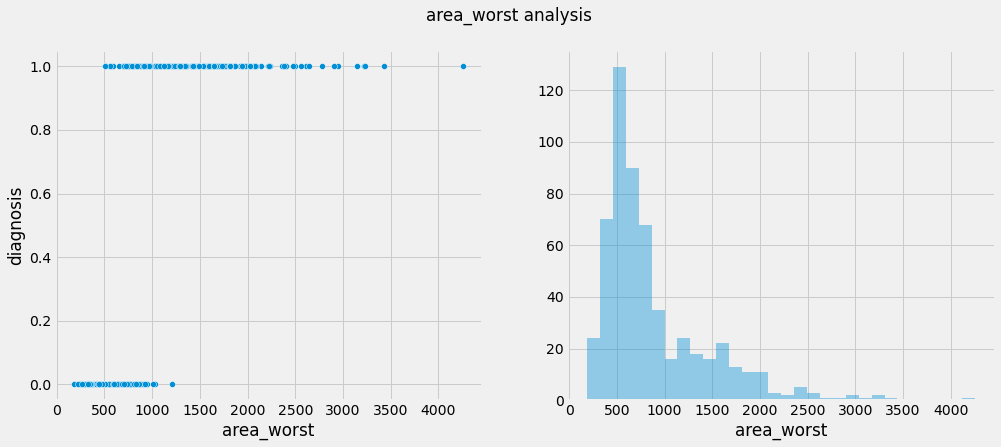

In [16]:
numeric("area_worst")

In [17]:
# Correlation matrix
data.corr()["diagnosis"].sort_values(ascending = False)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

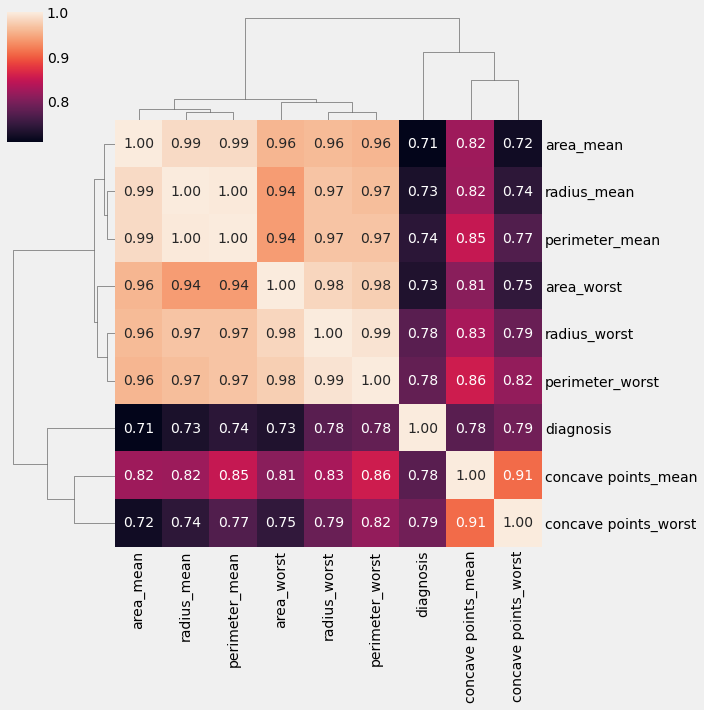

In [18]:
corr_matrix=data.corr()
threshold=0.7
filtre=np.abs(corr_matrix["diagnosis"])>threshold
corr_features=corr_matrix.columns[filtre].tolist()
sns.clustermap(data[corr_features].corr(),annot=True,fmt=".2f")

# 3) Outlier Detection

In [19]:
from collections import Counter
def outliers(data,columns):
    aykiri_indexler=[]
    for i in columns:
        Q1 = data[i].quantile(0.25)
        Q3 = data[i].quantile(0.75)
        IQR = Q3 -Q1
        alt_sinir = Q1 - 1.5*IQR
        ust_sinir = Q3 + 1.5*IQR
        filtre = ((data[i] < alt_sinir) | (data[i] > ust_sinir))
        aykiri_gozlemler = data[i][filtre]
        aykiri_index = aykiri_gozlemler.index
        aykiri_indexler.extend(aykiri_index)
        
    aykiri_indexler = Counter(aykiri_indexler) #benzersiz degerleri bulup bunları dict çevirir
    ortak_indexler = [i for i,v in aykiri_indexler.items() if v>2] #aynı anda ikiden fazla outlier varsa bir satır için bunu al
    
    return ortak_indexler

In [20]:
delete_index = outliers(data,data.columns)
data = data.drop(delete_index,axis=0).reset_index(drop=True)

# 4) Create Model

In [21]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [22]:
y = data.diagnosis.values.reshape(-1,1)
x = data.drop(["diagnosis"], axis = 1).values

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [24]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [25]:
random_state = 42
classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state),
             KNeighborsClassifier()]

In [26]:
dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}

knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}

In [27]:
classifier_param = [dt_param_grid,
                  svc_param_grid,
                  rf_param_grid,
                  logreg_param_grid,
                  knn_param_grid]

In [28]:
cv_results = []
best_estimators = []
for i in range(len(classifier)):
    gr = GridSearchCV(classifier[i], param_grid= classifier_param[i], 
                      cv = StratifiedKFold(n_splits = 10), scoring = "accuracy",
                      n_jobs = -1,verbose = 1)
    model = gr.fit(x_train, y_train)
    cv_results.append(model.best_score_)
    best_estimators.append(model.best_estimator_)
    print(cv_results[i])
    print(best_estimators[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 1100 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:   11.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


0.9434547908232119
DecisionTreeClassifier(max_depth=9, min_samples_split=10, random_state=42)
Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


0.9846153846153847
SVC(C=100, gamma=0.001, random_state=42)
Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   27.5s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:   39.4s finished


0.9690958164642373
RandomForestClassifier(bootstrap=False, max_features=10, min_samples_split=3,
                       random_state=42)
Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


0.9742914979757084
LogisticRegression(C=0.1, random_state=42)
Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.2s


0.9665991902834007
KNeighborsClassifier(metric='euclidean', n_neighbors=9)


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    1.2s finished


In [29]:
# Model Selection
df = pd.DataFrame({"Cross Validation" :cv_results,
                  "ML Models":["DT", "SVM", "RF", "LR", "KN"]})

<AxesSubplot:xlabel='Cross Validation', ylabel='ML Models'>

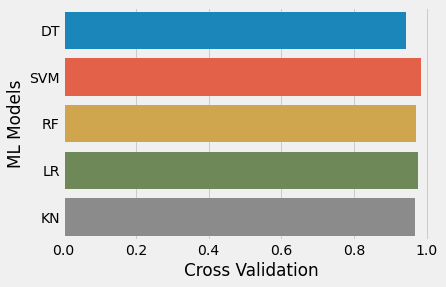

In [30]:
sns.barplot(x = "Cross Validation", y = "ML Models", data = df)

The best model is SVM

In [38]:
grid={"kernel" : ["rbf"],
                 "gamma": [0.001],
                 "C":[100]}
svm=SVC(random_state=42)
svm_cv=GridSearchCV(svm,grid,cv=10, scoring = "accuracy")
model=svm_cv.fit(x_train,y_train)
print("train accuracy:",model.best_score_)

train accuracy: 0.9846153846153847


In [39]:
y_head = model.predict(x_test)
print("Test Accuracy:", accuracy_score(y_test, y_head))

Test Accuracy: 0.9795918367346939


In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_head)

<AxesSubplot:>

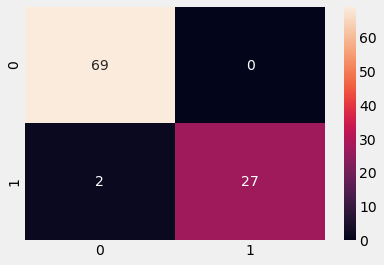

In [33]:
sns.heatmap(cm, annot = True)